<a href="https://colab.research.google.com/github/ARPIT-SINGHAL-22102003/DATA_SCIENCE/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING OS AND DISPLAYING FILES**

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/phishing_site_urls.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**INSTALLING SELENIUM**

In [2]:
%pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**IMPORTING LIBRARIES**

In [3]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

**LOADING THE DATA**

In [4]:
phish_data = pd.read_csv('./content/phishing_site_urls.csv')

**VIEWING THE TOP ROWS OF THE DATA SET**

In [5]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


**VIEWING THE BOTTOM ROWS OF THE DATASET**

In [6]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


**OVERVIEW OF THE DATAFRAME STRUCTURE**

In [7]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


**DATA CLEANING**

**CHECKING FOR THE MISSING VALUES**

In [8]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

**COUNT OF EACH CLASS LABEL**

In [9]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

**DATA TRANSFORMATION**

**INITAIALIZING TOKENIZER**

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

**LOOK AT THE FIRST URL**

In [11]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

**APPLYING TOKENIZER TO THE FIRST URL**

In [12]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

**TOKENIZING ALL THE ROWS**

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.202063800000019 sec


**SHOW RANDOM SAMPLE OF DATA**

In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized
276235,amazon.com/Monogram-Checklist-Corporation-1931...,good,"[amazon, com, Monogram, Checklist, Corporation..."
149155,bigpedia.com/encyclopedia/International_Phonet...,good,"[bigpedia, com, encyclopedia, International, P..."
384390,manta.com/mb_51_ALL_CPZ/lancaster_nh?pg=6,good,"[manta, com, mb, ALL, CPZ, lancaster, nh, pg]"
470504,youtube.com/watch?v=-ntAx0vrOjo,good,"[youtube, com, watch, v, ntAx, vrOjo]"
466579,worthpoint.com/worthopedia/gump-worsley-signed...,good,"[worthpoint, com, worthopedia, gump, worsley, ..."


**INITIALIZING STEMMER**

In [15]:
stemmer = SnowballStemmer("english") # choose a language

**APPLYING STEMMING TO TOKENIZED WORDS**

In [16]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 43.64696049999998 sec


**SAMPLE AFTER STEMMING**

In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
369282,krtv.com/sports/,good,"[krtv, com, sports]","[krtv, com, sport]"
449386,torrentreactor.net/torrents/4212287/Bootsauce-...,good,"[torrentreactor, net, torrents, Bootsauce, Stu...","[torrentreactor, net, torrent, bootsauc, studi..."
415857,pornhub.com/view_video.php?viewkey=539743707,good,"[pornhub, com, view, video, php, viewkey]","[pornhub, com, view, video, php, viewkey]"
136614,mail.emilydimitriadis.com/blog/wp-content/them...,bad,"[mail, emilydimitriadis, com, blog, wp, conten...","[mail, emilydimitriadi, com, blog, wp, content..."
77376,www.onlamp.com/pub/a/php/2004/01/15/simplexml....,good,"[www, onlamp, com, pub, a, php, simplexml, html]","[www, onlamp, com, pub, a, php, simplexml, html]"


**JOINING STEMMED TOKENS INTO SENTENCE STRINGS**

In [18]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.2505784000000517 sec


**SAMPLE AFTER JOINING WORDS**

In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
414190,pilotcareercenter.com/Air-Carrier-PCC-Profile/...,good,"[pilotcareercenter, com, Air, Carrier, PCC, Pr...","[pilotcareercent, com, air, carrier, pcc, prof...",pilotcareercent com air carrier pcc profil air...
429087,secretservice.gov/,good,"[secretservice, gov]","[secretservic, gov]",secretservic gov
412981,pennantchase.com/lgHome.aspx?lgid=144,good,"[pennantchase, com, lgHome, aspx, lgid]","[pennantchas, com, lghome, aspx, lgid]",pennantchas com lghome aspx lgid
499412,brokelimiteds.in/cdn/images/bro.exe,bad,"[brokelimiteds, in, cdn, images, bro, exe]","[brokelimit, in, cdn, imag, bro, exe]",brokelimit in cdn imag bro exe
545097,oyunbee.com/yygcieumw8,bad,"[oyunbee, com, yygcieumw]","[oyunbe, com, yygcieumw]",oyunbe com yygcieumw


**EXPLORATORY DATA ANALYSIS**

**SPLITTING THE DATASET BY LABELS**

In [20]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

**PREVIEW BAD URLs**

In [21]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


**PREVIEW GOOD URLs**

In [22]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


**LABEL COUNT VISUALIZATION**

In [23]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())
# Rename the 'count' column to 'Label' for consistency
label_counts = label_counts.rename(columns={'count': 'Label'}) # Rename the count column to Label

#visualizing target_col
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.Label)
fig.show()

**DEFINE FUNCTION TO PLOT A WORD CLOUD**

In [24]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
d = '/content/mask/mask-wordclouds'

**PREPARE text_sent DATA FROM GOOD URLs**

In [25]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

**CONVERTING GOOD URL TEXT DATA TO STRING AND THEN GENERATING A WORD CLOUD**

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


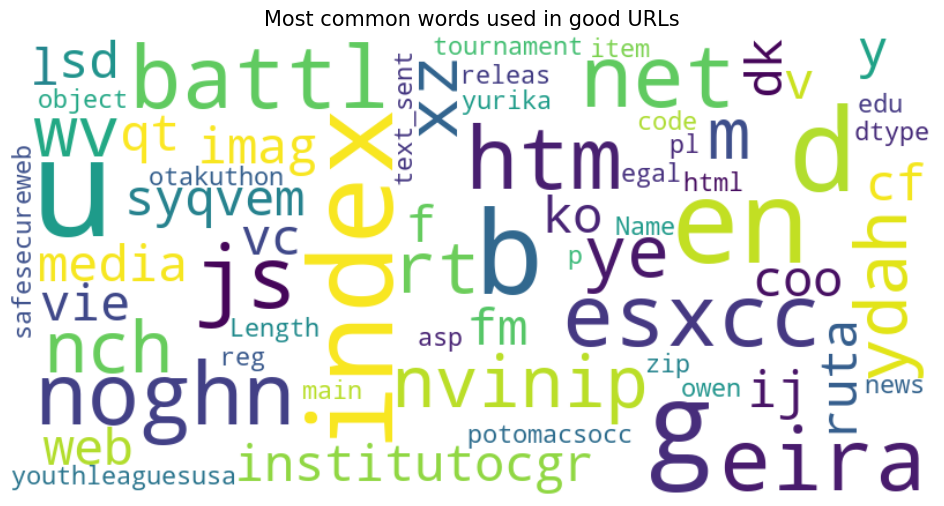

In [26]:
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert your data to string
common_text = str(data)

# Create the word cloud without a mask
wordcloud = WordCloud(width=800, height=400, max_words=400, max_font_size=120,
                      background_color='white').generate(common_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in good URLs', fontsize=15)
plt.show()


**ASSIGN BAD URL TEXT DATA TO DATA AND RESET INDEX**

In [27]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

**GENERATING THE WORD CLOUD FOR BAD URLs**

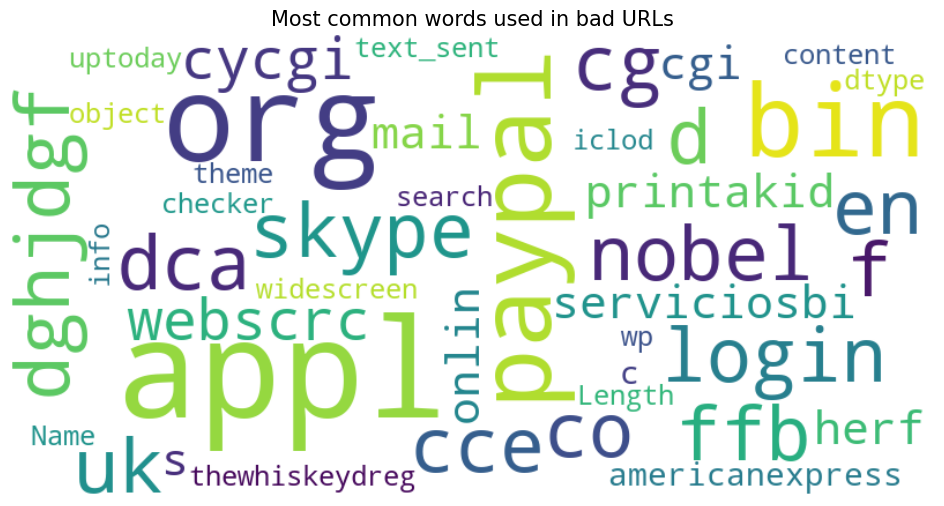

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert your data to string
common_text = str(data)

# Generate the word cloud (no mask)
wordcloud = WordCloud(width=800, height=400, max_words=400, max_font_size=120,
                      background_color='white').generate(common_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in bad URLs', fontsize=15)
plt.show()


**FEATURE ENGINEERING**

**CREATE COUNTVECTORIZER OBJECT**

In [29]:
#create cv object
cv = CountVectorizer()

**OPTIONAL HELP INFORMATIN**

In [30]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |
 |  Convert a collection of text documents to a matrix of token counts.
 |
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_auto_exam

**TRANSORM FULL DATASET TEXT INTO BAG OF WORDS**

In [31]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

**PREVIEWING THE FORST FEW TRANSFORMED VECTORS**

In [32]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**DATASET SPLITTING**

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [33]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

**TRAINING THE LOGISTIC REGRESSION MODEL**

In [34]:
# create lr object
lr = LogisticRegression()

In [35]:
lr.fit(trainX,trainY)

LogisticRegression()

**EVALUATING THE LOGISTIC REGRESSION ACCURACY**

In [36]:
lr.score(testX,testY)

0.9623917808019689

**STORING MODEL ACCURACY**

In [37]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

**Evaluating Logistic Regression Model Performance**

Training Accuracy : 0.9786849316398428
Testing Accuracy : 0.9623917808019689

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.96      0.93     36703
        Good       0.99      0.96      0.97    100634

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

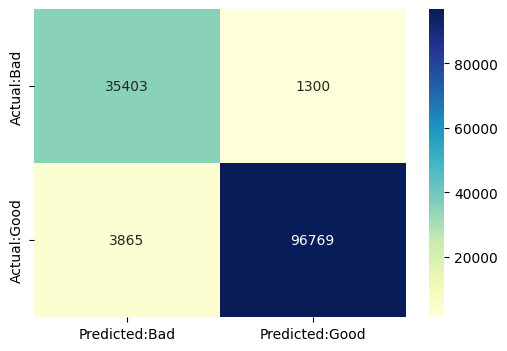

In [38]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**CREATING A MULTINOMIAL NAIVE BAYES(MNB) CLASSIFIER** 

In [39]:
# create mnb object
mnb = MultinomialNB()

In [40]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [41]:
mnb.score(testX,testY)

0.9564501918638094

In [42]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740709547606969
Testing Accuracy : 0.9564501918638094

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.93      0.92     38349
        Good       0.97      0.97      0.97     98988

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

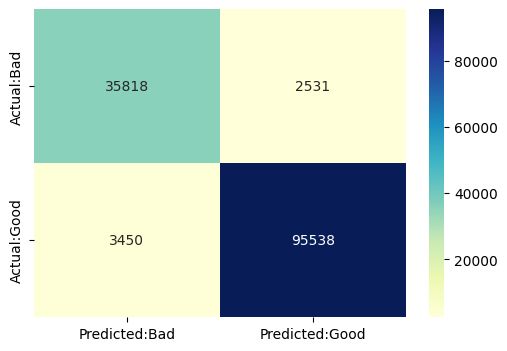

In [43]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

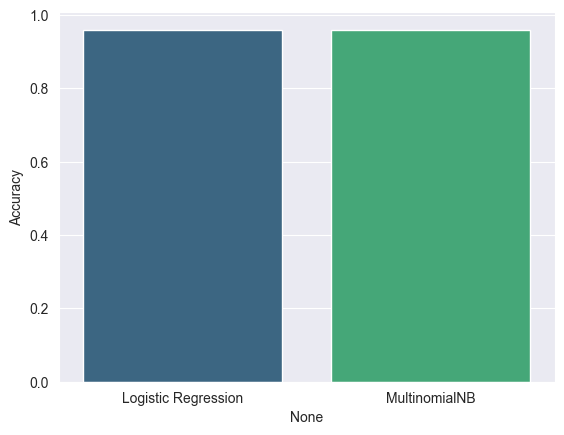

In [44]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy, palette="viridis") # Using the "viridis" palette

**PIPELINE CREATION**

In [45]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray

In [46]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [47]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [48]:
pipeline_ls.score(testX,testY)

0.9661708061192541

Training Accuracy : 0.9799130601515986
Testing Accuracy : 0.9661708061192541

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36833
        Good       0.99      0.97      0.98    100504

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

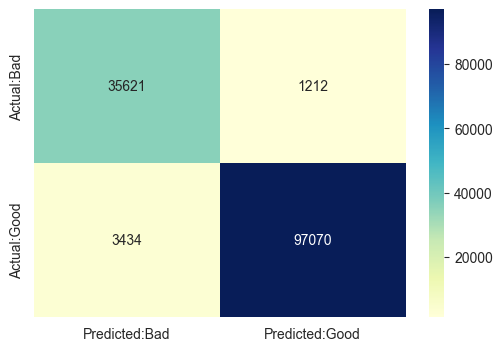

In [49]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Model Saving and Deployment**

In [50]:
import pickle  # ✅ This is all you need!

# Save your pipeline to a file
with open('phishing.pkl', 'wb') as f:
    pickle.dump(pipeline_ls, f)


In [51]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9661708061192541


In [52]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
